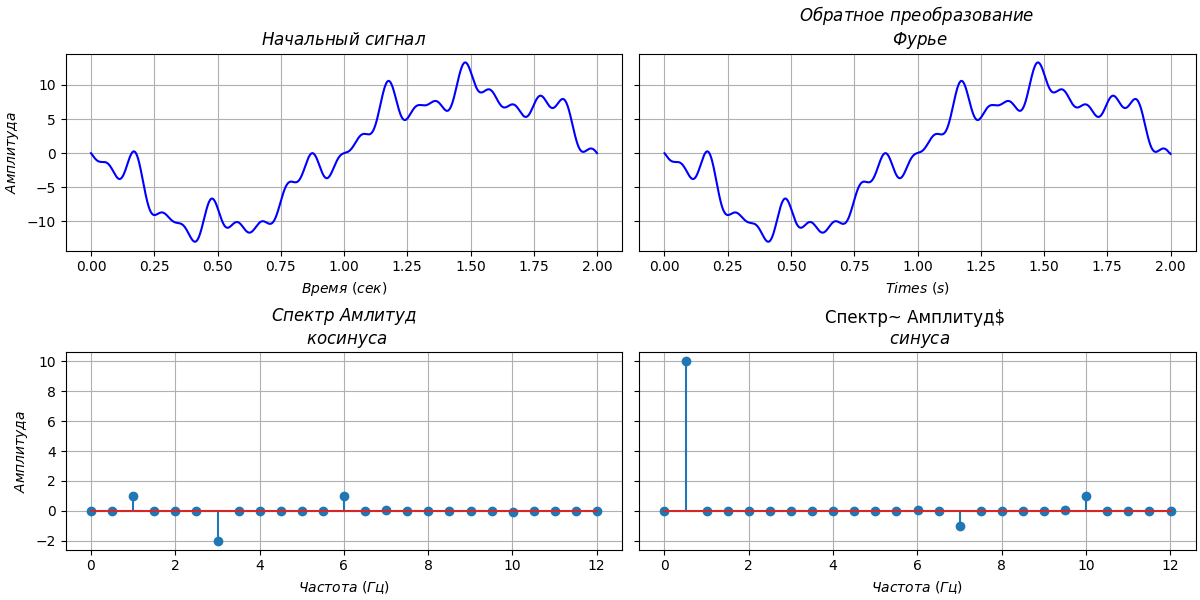

In [38]:
# @title $\large FFT~ and~ RFFT$
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

#Define variables
n = 1000
T = 2
w = 2*np.pi
t = np.linspace(0, T, n)
k = 1

#Signal
def func1(x):
    return np.e**(-50*(x%T-0.5)**2) / (7*np.sqrt(np.pi)) * np.cos(12*w * x)

def func2(x):
    return np.cos(1*w * x) - 2*np.cos(3*w * x) + np.cos(6*w * x) - np.sin(10*w * x) - 10*np.sin(0.5*w * x) + np.sin(7*w * x)

vfunc = np.vectorize(func2)

#FFT
yf = scp.fftpack.fft(vfunc(t*k)) / n * T
xf = np.linspace(0, n/T, n)

#RFFT
sig = 0*t
for i in range(n//T):
    sig += (yf[i].real) * np.cos(xf[i]*w * t) - (yf[i].imag) * np.sin(xf[i]*w * t)

#Plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=100, layout='constrained', sharey='row')
ax1, ax2, ax3, ax4 = axs.flat

#Plot signal
ax1.plot(t, vfunc(t*k), color='blue')
ax1.set_title('$Начальный~ сигнал$')
ax1.set_ylabel('$Амплитуда$')
ax1.set_xlabel('$Время~ (сек)$')
ax1.grid(True)

#Plot RFFT
ax2.plot(t, sig, color='blue')
ax2.set_title('$Обратное~ преобразование$ \n $Фурье$')
# ax2.set_ylabel('$Amplitude$')
ax2.set_xlabel('$Times~ (s)$')
ax2.grid(True)

L = 25*k
#Amplitudes of cosine
ax3.stem(xf[:L], yf[:L].real)
ax3.set_title('$Спектр~ Амлитуд$ \n $косинуса$')
ax3.set_xlabel('$Частота~ (Гц)$')
ax3.set_ylabel('$Амплитуда$')
ax3.grid(True)

#Amplitudes of sinus
ax4.stem(xf[:L], yf[:L].imag)
ax4.set_title('Спектр~ Амплитуд$ \n $синуса$')
ax4.set_xlabel('$Частота~ (Гц)$')
# ax4.set_ylabel('$Амлитуда$')
ax4.grid(True)

# Save figure
fig.savefig('FFTexample.png')

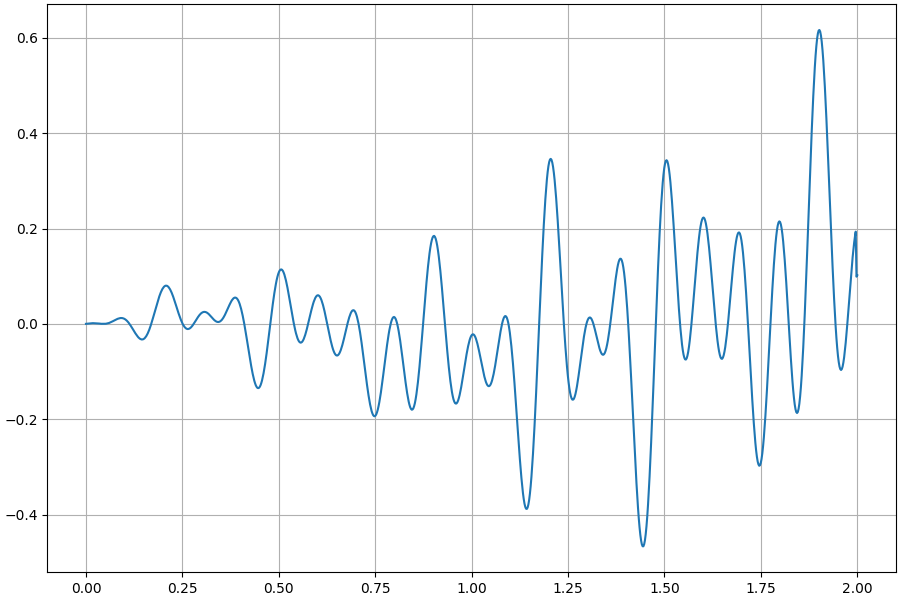

In [34]:
fig, axs = plt.subplots(figsize=(9, 6), dpi=100, layout='constrained')
axs.plot(t, vfunc(k*t)-sig)
axs.grid(True)

In [40]:
T = 1
isinstance(T, int|float)

True

In [41]:
f = lambda x: x
type(f)

function

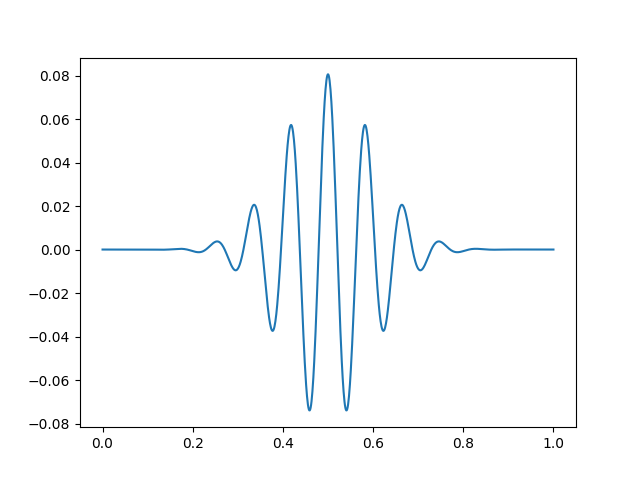

In [62]:
from typing import Callable
import numpy as np
import scipy as scp
from functools import partial

class Signal():
    def __init__(self, signal: Callable, T: int|float=1, n: int=1000):
        '''
        
        '''
        
        if isinstance(n, int):
            self.n = n
        else:
            try:
                self.n = int(n)
            except ValueError:
                raise Exception('n must be positive integer')
        
        if isinstance(T, int|float) and T > 0:
            self.T = T
        else:
            raise Exception('T must be positive integer')

        self.w = 2*np.pi
        self.t = np.linspace(0, T, n)
        
        if isinstance(signal, Callable):
            self.signal = np.vectorize(signal)
        else:
            raise Exception('signal must be callable')
    
    def fft():
        self.yf = scp.fftpack.fft(self.signal(self.t)) / self.n * self.T
        self.xf = np.linspace(0, self.n/self.T, self.n)
    
    def rfft():
        def func(i):
            return (self.yf[i].real) * np.cos(self.xf[i]*self.w * self.t) - (self.yf[i].imag) * np.sin(self.xf[i]*self.w * self.t)
        vfunc = np.vectorize(func)
        return vfunc(np.arange(self.n//self.T))
    
    def __repr__(self):
        fig, ax = plt.subplots()
        ax.plot(self.t, self.signal(self.t))
        ax.grid(True)
        return ''


T, w = 1, 2*np.pi
signal = Signal(lambda x: np.e**(-50*(x%T-0.5)**2) / (7*np.sqrt(np.pi)) * np.cos(12*w * x))
signal